In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/data.csv')
df.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [5]:
df = df.replace("?", np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [7]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [8]:
df = df.drop(columns=['slope', 'ca', 'thal'])
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [9]:
df = df.fillna(df.median())
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [10]:
[col for col in df.columns if 'num' in col.lower()]

['num       ']

In [11]:
X = df.drop(columns=['num       '])   # all features
y = df['num       ']   

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

In [13]:
scaler = StandardScaler()
# Fit the scaler ONLY on the training data, not test data
X_train_scaled = scaler.fit_transform(X_train)
# Apply the same scaling to test data
X_test_scaled = scaler.transform(X_test)

In [14]:
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # leaf node prediction

In [15]:
def gini_impurity(y):
    classes = np.unique(y)
    impurity = 1.0
    for cls in classes:
        p = np.sum(y == cls) / len(y)
        impurity -= p ** 2
    return impurity

In [16]:
def split_dataset(X, y, feature_index, threshold):
    left_idx = np.where(X[:, feature_index] <= threshold)
    right_idx = np.where(X[:, feature_index] > threshold)
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]

In [17]:
def best_split(X, y, n_features_to_consider=None):
    n_total_features = X.shape[1]
    
    # Random subset of features
    if n_features_to_consider is None:
        feature_indices = range(n_total_features)
    else:
        feature_indices = np.random.choice(n_total_features, n_features_to_consider, replace=False)

    best_feature, best_threshold = None, None
    best_gain = -1
    current_impurity = gini_impurity(y)

    for feature in feature_indices:
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            left_impurity = gini_impurity(y_left)
            right_impurity = gini_impurity(y_right)
            p_left = len(y_left) / len(y)
            p_right = len(y_right) / len(y)

            gain = current_impurity - (p_left * left_impurity + p_right * right_impurity)

            if gain > best_gain:
                best_feature = feature
                best_threshold = threshold
                best_gain = gain

    return best_feature, best_threshold

In [18]:
def build_tree(X, y, depth=0, max_depth=5, min_samples=2, n_features_to_consider=None):
    # stopping conditions
    if depth >= max_depth or len(y) < min_samples or len(np.unique(y)) == 1:
        leaf_value = np.bincount(y).argmax()
        return DecisionTreeNode(value=leaf_value)

    feature, threshold = best_split(X, y, n_features_to_consider)

    if feature is None:
        leaf_value = np.bincount(y).argmax()
        return DecisionTreeNode(value=leaf_value)

    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)

    left_child = build_tree(
        X_left, y_left, depth + 1, max_depth, min_samples, n_features_to_consider
    )
    right_child = build_tree(
        X_right, y_right, depth + 1, max_depth, min_samples, n_features_to_consider
    )

    return DecisionTreeNode(feature, threshold, left_child, right_child)

In [19]:
def predict_one_tree(x, tree):
    if tree.value is not None:
        return tree.value

    if x[tree.feature_index] <= tree.threshold:
        return predict_one_tree(x, tree.left)
    else:
        return predict_one_tree(x, tree.right)

In [20]:
class RandomForestScratch:
    def __init__(self, n_trees=10, max_depth=5, min_samples=2, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.trees = []
        self.max_features = max_features  # number of features each tree will consider
    
    def bootstrap(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        n_features = X.shape[1]

        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))  # default RF behavior

        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap(X, y)
            tree = build_tree(
                X_sample,
                y_sample,
                max_depth=self.max_depth,
                min_samples=self.min_samples,
                n_features_to_consider=self.max_features
            )
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([[predict_one_tree(x, tree) for x in X] for tree in self.trees])
        final_predictions = []
        for sample_preds in tree_preds.T:
            final_predictions.append(np.bincount(sample_preds).argmax())
        return np.array(final_predictions)
    
    def predict_proba(self, X):
        predictions = self.predict(X)
        return predictions  # optional: could return proportion of votes for class 1

In [21]:
rf = RandomForestScratch(
    n_trees=10,
    max_depth=8,
    min_samples=2,
    max_features=None
)

rf.fit(X_train_scaled, y_train.values)

y_pred_rf = rf.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Basic metrics
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy:  0.847457627118644
Precision: 0.8
Recall: 0.7619047619047619
F1 Score: 0.7804878048780488


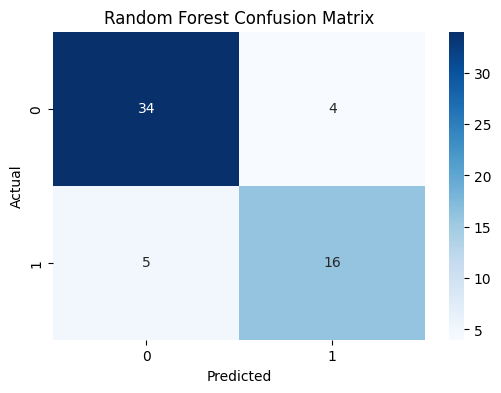

In [24]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [25]:
def predict_proba(self, X):
    # Collect predictions from all trees
    tree_preds = np.array([[predict_one_tree(x, tree) for x in X] 
                           for tree in self.trees])

    # Probability = fraction of trees voting for class 1
    probs = np.mean(tree_preds == 1, axis=0)
    return probs

In [26]:
y_proba_rf = rf.predict_proba(X_test_scaled)  

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

AUC Score: 0.8283208020050126


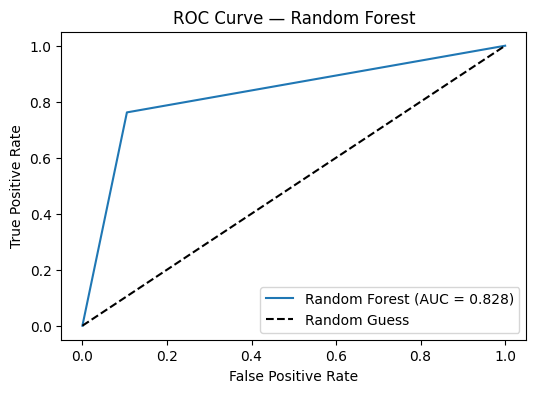

In [27]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()

In [29]:
dt_results = pd.DataFrame([{
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "AUC": roc_auc
}])

dt_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.847458,0.8,0.761905,0.780488,0.828321
